In [1]:
# pip install pandas numpy matplotlib seaborn scikit-learn

## Earthquake Building Damage Predicition System


### Project Workflow
Data Collection -> EDA (Exploratory Data Analysis) -> Data Preprocessing -> Model Development -> Model Evaluation -> Model Deployment

Connect to google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay
import time
import pickle


PALETTE = sns.color_palette("rocket_r")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Anish\AppData\Local\Temp\ipykernel_1980\2568341756.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Configuring Pandas

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 1. Data Collection
- Data was collected from Kaggle.com. Kaggle is a hub for data scientists, ML engineers, AI researchers where you can find and study various opensource datasets, research projects, notebooks. You can explore on your free time.

Link to dataset used in this project: [Earthquake Data](https://www.kaggle.com/datasets/arashnic/earthquake-magnitude-damage-and-impact?resource=download&select=csv_building_structure.csv)


Reading Data From CSV File

In [4]:
# For google drive
df = pd.read_csv("csv_building_structure.csv")

# For local run
# df = pd.read_csv("csv_building_structure.csv")
# df.head(10)

In [5]:
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


### Exploratory Data Analysis (EDA)

In [6]:
# checking shape of data
df.shape

(762106, 31)

Checking the columns, count and datatypes of each column

Alternatively you can run df.columns, df.count() and df.dtypes which will show these results separately

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

Checking some statistics of data

In [8]:
# for numerical columns
df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607514e+11,25.767835,2582.688357,258274.277335,2.087783,1.252058,24.326405,406.672576,16.049372,9.868817,0.042401,0.800271,0.035121,0.015815,0.022961,0.071525,0.258766,0.080482,0.039794,0.016386,0.012026
std,5.801855e+10,5.807555,581.172767,58117.348412,0.655101,1.063275,65.043704,226.779371,5.493878,8.574169,0.201502,0.399797,0.184086,0.124761,0.149780,0.257701,0.437957,0.272039,0.195474,0.126955,0.109001
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# for categorical columns
df.describe(include='object')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed
count,762106,762106,762106,762106,762106,762105,762105,762106,762094,762094
unique,3,5,3,5,4,4,10,8,5,4
top,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Grade 5,Reconstruction
freq,631675,628716,503748,618217,486907,604453,731257,207968,275766,470219


In [10]:
# Here our main target column is damage grade as we are predicting damage grade of the buildings
df["damage_grade"].value_counts()

damage_grade
Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: count, dtype: int64

This shows that data is unevenly distributed

In [11]:
# checking for duplicates
duplicate_counts = df.duplicated().sum()
print(duplicate_counts)

0


In [12]:
# checking for null values
null_counts = df.isnull().sum()
print(null_counts)

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

Let's do some visualization in this data

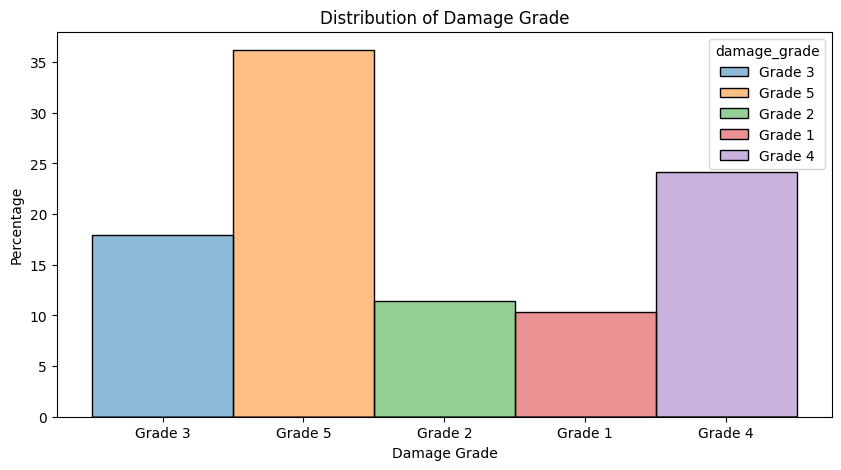

In [13]:
# Visualizing distribution of damage grade
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x="damage_grade", hue="damage_grade", stat="percent",ax=ax, binwidth=.75)
plt.xlabel("Damage Grade")
plt.ylabel("Percentage")
plt.title("Distribution of Damage Grade");

           foundation_type damage_grade  counts  percentage
0            Bamboo/Timber      Grade 1   17201   29.929357
1            Bamboo/Timber      Grade 2   13357   23.240883
2            Bamboo/Timber      Grade 3   13244   23.044265
3            Bamboo/Timber      Grade 4    8368   14.560134
4            Bamboo/Timber      Grade 5    5302    9.225362
5       Cement-Stone/Brick      Grade 1   11642   29.664925
6       Cement-Stone/Brick      Grade 2    8847   22.542999
7       Cement-Stone/Brick      Grade 3    7104   18.101669
8       Cement-Stone/Brick      Grade 4    5621   14.322844
9       Cement-Stone/Brick      Grade 5    6031   15.367563
10  Mud mortar-Stone/Brick      Grade 1   29484    4.689640
11  Mud mortar-Stone/Brick      Grade 2   56044    8.914197
12  Mud mortar-Stone/Brick      Grade 3  112442   17.884700
13  Mud mortar-Stone/Brick      Grade 4  168458   26.794443
14  Mud mortar-Stone/Brick      Grade 5  262277   41.717021
15                   Other      Grade 1 

C:\Users\Anish\AppData\Local\Temp\ipykernel_1980\3519625589.py:12: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=df_found, x='foundation_type', y='percentage', hue='damage_grade', ax=ax, palette=PALETTE)


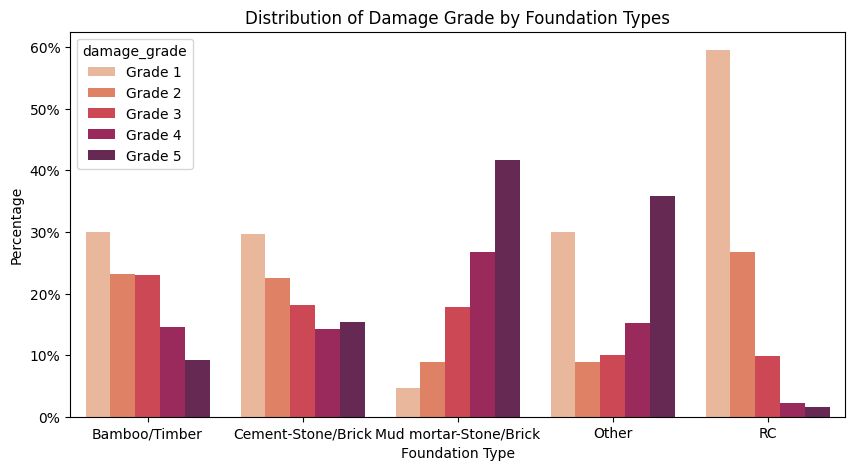

In [14]:
# Visualizing the distribution of damage grade by foundation type
# Create new df grouped by foundation type and damage grade and its counts
df_found = df.groupby(["foundation_type", "damage_grade"]).size().reset_index(name="counts")


# Converting counts into percentage
df_found['percentage'] = df_found.groupby('foundation_type')['counts'].transform(lambda x: x / x.sum() * 100)

print(df_found)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_found, x='foundation_type', y='percentage', hue='damage_grade', ax=ax, palette=PALETTE)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=None, symbol='%', is_latex=False))

plt.xlabel("Foundation Type")
plt.ylabel("Percentage")
plt.title("Distribution of Damage Grade by Foundation Types")

plt.show()

- Buldings with foundation of Mud-mortar-Stone/Brick suffered the most damage from the earthquake. Almost 80% of these buildings suffered grade 4 or 5 damage.
- Buildings with foundation of RC suffered the least damage from the earthquake.

C:\Users\Anish\AppData\Local\Temp\ipykernel_1980\674510718.py:9: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=df_roof, x='roof_type', y='percentage', hue='damage_grade', ax=ax, palette=PALETTE)


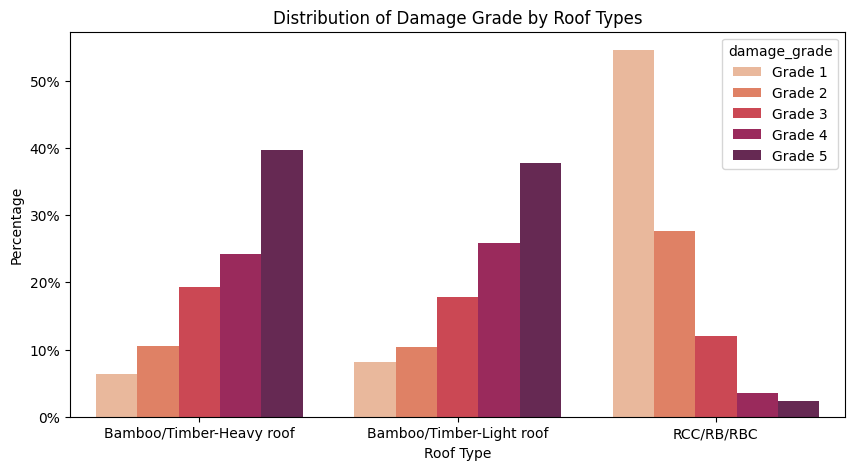

In [15]:
# Visualizing the distribution of damage grade by Roof type
# Create new df grouped by roof type and damage grade and its counts
df_roof = df.groupby(["roof_type", "damage_grade"]).size().reset_index(name="counts")

# Converting counts into percentage
df_roof['percentage'] = df_roof.groupby('roof_type')['counts'].transform(lambda x: x / x.sum() * 100)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_roof, x='roof_type', y='percentage', hue='damage_grade', ax=ax, palette=PALETTE)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=None, symbol='%', is_latex=False))

plt.xlabel("Roof Type")
plt.ylabel("Percentage")
plt.title("Distribution of Damage Grade by Roof Types")

plt.show()

Buildings having Bamboo/Timber heavy roof are prone to serious damages by earthquake whereas buildings made up of RCC/RB/RBC rooftype seems to resilient to high damage.

C:\Users\Anish\AppData\Local\Temp\ipykernel_1980\312286086.py:9: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=df_position, x='position', y='percentage', hue='damage_grade', ax=ax, palette=PALETTE)


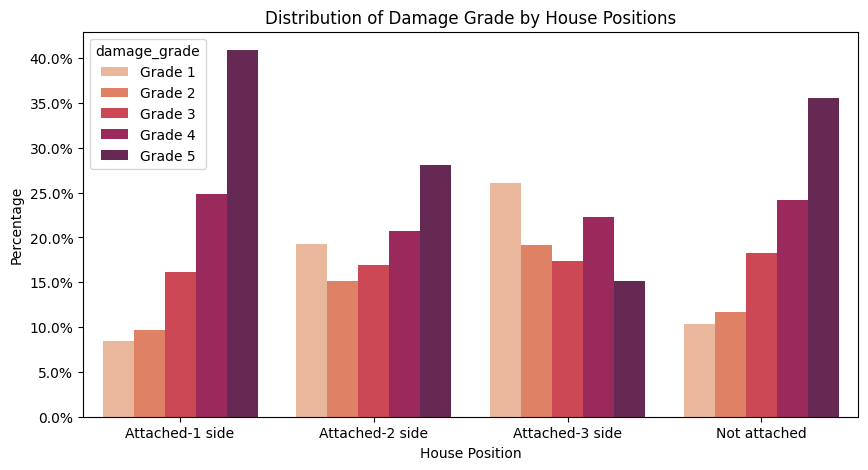

In [16]:
# Visualizing the distribution of damage grade by House positions
# Create new df grouped by house position and damage grade and its counts
df_position = df.groupby(["position", "damage_grade"]).size().reset_index(name="counts")

# Converting counts into percentage
df_position['percentage'] = df_position.groupby('position')['counts'].transform(lambda x: x / x.sum() * 100)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_position, x='position', y='percentage', hue='damage_grade', ax=ax, palette=PALETTE)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=None, symbol='%', is_latex=False))

plt.xlabel("House Position")
plt.ylabel("Percentage")
plt.title("Distribution of Damage Grade by House Positions")

plt.show()

- Buildings having buildings attached to 3 sides seem to be less affected by the earthquake.
- Buildings having building attached to only 1 side seems to be the most affected by the earthquake.

### Data Preprocessing

Cleaning Data
- This handles missing, inaccurate and inconsistent data

In [17]:
# checking the null and nan values in each column
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [18]:
# Replace missing values by mean, median or mode. Also called imputation, help retain all data.
def cleanDataByReplacing(df):
    nan_cols = [col for col in df.columns if df[col].isna().sum() >0]
    for col in nan_cols:
        if col != 'damage_grade':
            df[col].fillna(df[col].mode()[0],inplace=True)
        else:
            df.dropna(inplace=True)
    return df

In [19]:
# Totally remove the rows with missing values. May cause loss of data
def cleanDataByRemoving(df):
    df.dropna(inplace=True)
    return df

In [20]:
# df1 = cleanDataByReplacing(df)
# df1.isna().sum()

In [21]:
df = cleanDataByRemoving(df)
df.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

From this it can be seen that replacing nan data with mode is same as dropping the nan data as there are only 12 missing values altogether in the target column and dropping those values resulted in same result in both replacing and removing the nan data

Variable Encoding

- Ordinal variables are those whose values have some kind of order and they were encoded using label encoder
- Similarly all other categorical variables were nomincal variables and they were encoded using One hot encoding

Examples
In Label Encoding / Ordinal Encoding  
Intially, shirt_size = ["small","medium", "large"]  
Finally after encoding, shirt_size = [0,1,2]  
Now new column is created here  

color = ["white","orange","black"]  
color_white = [0,1]  
color_orange = [0,1]  
color_black = [0,1]  



## Why do we need to encode categorical variables?
- Because several ml algorithms in libraries like Scikit-learn, tensorflow are designed to work with only numericla data.
- To perform mathematical operations like correlation

In [22]:
numeric_cols = [col for col in df.columns if df[col].dtype == 'int64']
numeric_cols

['building_id',
 'district_id',
 'vdcmun_id',
 'ward_id',
 'count_floors_pre_eq',
 'count_floors_post_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other']

In [23]:
def encodeVariables(df):
    # Categorical ordinal columns
    cat_ordinal=["land_surface_condition","position","damage_grade","technical_solution_proposed"]
    # Nominal ordinal columns
    cat_nominal=["foundation_type","ground_floor_type","other_floor_type","plan_configuration","condition_post_eq","roof_type"]
    df[cat_ordinal] = df[cat_ordinal].apply(LabelEncoder().fit_transform)
    df = pd.get_dummies(df,columns=cat_nominal,prefix=cat_nominal)
    return df

In [24]:
# Before encoding
print(df.shape)
print(df.columns)
df.head(5)

(762094, 31)
Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [25]:
# After encoding
df = encodeVariables(df)

print(df.shape)
print(df.columns)
df.head(5)

(762094, 60)
Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'position', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade', 'technical_solution_proposed',
       'foundation_type_Bamboo/Timber', 'foundation_type_Cement-Stone/Brick',
       'foundation_type_Mud mortar-Stone/Brick', 'foundation_type_Other',
       'foundation_type_RC', 'ground_floor_type_Brick/Stone',
       'ground_floor_type_Mud', 'ground_flo

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade,technical_solution_proposed,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,roof_type_Bamboo/Timber-Heavy roof,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,3,0,1,0,0,0,0,0,1,0,0,0,2,0,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,3,0,1,0,0,0,0,0,1,0,0,0,4,3,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,3,0,1,0,0,0,0,0,0,0,0,0,1,1,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,3,0,1,0,0,0,0,0,0,0,0,0,1,1,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,3,0,1,0,0,0,0,0,0,0,0,0,0,1,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762094 entries, 0 to 762105
Data columns (total 60 columns):
 #   Column                                                     Non-Null Count   Dtype
---  ------                                                     --------------   -----
 0   building_id                                                762094 non-null  int64
 1   district_id                                                762094 non-null  int64
 2   vdcmun_id                                                  762094 non-null  int64
 3   ward_id                                                    762094 non-null  int64
 4   count_floors_pre_eq                                        762094 non-null  int64
 5   count_floors_post_eq                                       762094 non-null  int64
 6   age_building                                               762094 non-null  int64
 7   plinth_area_sq_ft                                          762094 non-null  int64
 8   height_ft_pre_eq   

### Feature Engineering
This step includes creating new features from existing ones and modifying existing features to improve the performance of ml models based on their importance.

Involves selecting, transforming, creating features that are more informative, relevant and suitable for given ML task

In [27]:
# Adding two new columns net_floors and net_height from count_floors and height
df['net_floor'] = df['count_floors_pre_eq'] - df['count_floors_post_eq']
df['net_height'] = df['height_ft_pre_eq'] - df['height_ft_post_eq']

We created 2 new features net_floor and net_height using the features count_floors and height_ft



In [28]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'position', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade', 'technical_solution_proposed',
       'foundation_type_Bamboo/Timber', 'foundation_type_Cement-Stone/Brick',
       'foundation_type_Mud mortar-Stone/Brick', 'foundation_type_Other',
       'foundation_type_RC', 'ground_floor_type_Brick/Stone',
       'ground_floor_type_Mud', 'ground_floor_type_Other

In [29]:
df.shape

(762094, 62)

In [30]:
# All the negative height and negative floor values were removed
df = df[df['net_floor'] >= 0]
df.shape

(761247, 62)

In [31]:
df = df[df['net_height'] >= 0]
df.shape

(759416, 62)

We then converted the net_floor and net_height to percentage to minimize the effect of scale



In [32]:
# Adding two new columns net_floors and net_height from count_floors and height
df['net_floor'] = df['net_floor']/df.count_floors_pre_eq
df['net_height'] = df['net_height']/df.height_ft_pre_eq

In [33]:
df['net_floor'].value_counts().sort_values(ascending=False)

net_floor
0.000000    441631
1.000000    261353
0.500000     32721
0.666667     13242
0.333333      9966
0.250000       305
0.750000        80
0.400000        45
0.200000        36
0.800000        10
0.166667         9
0.600000         9
0.142857         2
0.888889         2
0.777778         2
0.833333         1
0.875000         1
0.125000         1
Name: count, dtype: int64

In [34]:
df['net_height'].value_counts().sort_values(ascending=False)

net_height
0.000000    441634
1.000000    261353
0.500000     18577
0.666667      6017
0.333333      5101
0.600000      1960
0.533333      1584
0.611111      1180
0.250000      1098
0.625000      1046
0.466667       941
0.571429       932
0.461538       775
0.555556       757
0.650000       724
0.400000       719
0.562500       596
0.588235       582
0.428571       548
0.538462       542
0.200000       529
0.636364       484
0.444444       474
0.647059       450
0.222222       448
0.300000       436
0.529412       388
0.375000       350
0.285714       348
0.294118       324
0.416667       322
0.700000       316
0.454545       250
0.680000       247
0.437500       242
0.631579       234
0.619048       217
0.545455       209
0.470588       194
0.272727       190
0.526316       189
0.590909       189
0.411765       187
0.550000       180
0.578947       168
0.166667       154
0.681818       151
0.523810       144
0.263158       143
0.318182       139
0.363636       136
0.277778       130
0

It was seen that net_height and net_floor were perfectly correlated with correlation of 1 so we combined both into net_height_floor by taking average of net_height and net_floor

In [35]:
df['net_height_floor'] = (df['net_height'] + df['net_floor'])/2
df['net_height_floor'].value_counts().sort_values(ascending=False)

net_height_floor
0.000000    441630
1.000000    261353
0.500000     18395
0.666667      5719
0.333333      4592
0.516667      1506
0.550000      1001
0.633333       939
0.483333       897
0.638889       799
0.480769       770
0.535714       743
0.645833       705
0.291667       681
0.658333       564
0.527778       559
0.416667       536
0.519231       517
0.531250       507
0.583333       485
0.450000       470
0.464286       457
0.555556       422
0.266667       411
0.277778       400
0.472222       393
0.656863       385
0.316667       384
0.514706       363
0.250000       338
0.562500       333
0.544118       298
0.313725       286
0.458333       282
0.437500       281
0.627451       281
0.651515       269
0.683333       234
0.468750       231
0.477273       226
0.309524       226
0.673333       223
0.611111       199
0.375000       198
0.366667       193
0.649123       191
0.642857       188
0.485294       178
0.619048       177
0.513158       174
0.600000       162
0.455882      

In [36]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'position', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade', 'technical_solution_proposed',
       'foundation_type_Bamboo/Timber', 'foundation_type_Cement-Stone/Brick',
       'foundation_type_Mud mortar-Stone/Brick', 'foundation_type_Other',
       'foundation_type_RC', 'ground_floor_type_Brick/Stone',
       'ground_floor_type_Mud', 'ground_floor_type_Other

Visualizing the correlation between different columns in dataset

### Feature Removal
- We removed technical_solution_proposed which had most correlation with the output target variable as it kind of seemed like an output variable itself.
- Also irrelevant features like building id, district id, vdcmun id, ward id were removed
- We feature engineered net_height_floor from count_floors and height_ft so these two along with net_height and net_floor were also removed

In [37]:
df = df.drop(['technical_solution_proposed','building_id','district_id','vdcmun_id','ward_id','count_floors_post_eq','count_floors_pre_eq','height_ft_post_eq','height_ft_pre_eq','net_height','net_floor'],axis=1)

In [38]:
df.shape

(759416, 52)

In [39]:
df.columns

Index(['age_building', 'plinth_area_sq_ft', 'land_surface_condition',
       'position', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade', 'foundation_type_Bamboo/Timber',
       'foundation_type_Cement-Stone/Brick',
       'foundation_type_Mud mortar-Stone/Brick', 'foundation_type_Other',
       'foundation_type_RC', 'ground_floor_type_Brick/Stone',
       'ground_floor_type_Mud', 'ground_floor_type_Other',
       'ground_floor_type_RC', 'ground_floor_type_Timber',
       'other_floor_type_Not applicable', 'other_floor_type_RCC/RB/RBC',
       'other_floor_type_TImber/Bamboo-Mud', 'other_

### Feature Selection
- Here damage_grade is the target and rest of all the columns are the features
- Also for we splitted dataset into training dataset and test dataset using split ratio of 75-25
- Also we used stratify=y so there will be equal percentage of rows in both train and test in each class

In [40]:
def selectFeatures(df):
    # Variables for selecting features
    random_seed = 42
    test_ratio = 0.25
    # Damage grade is the required target variable
    y = df["damage_grade"]
    # Technical solution proposed is conflicting with output so trying by dropping it
    # Currently considering all other columns as features
    X = df.drop("damage_grade",axis=1)
    # stratify help to make equal distribution of classes in both train and test
    X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = test_ratio, random_state = random_seed, stratify = y)
    return X_train, X_test, y_train, y_test, X, y

In [41]:
X_train, X_test, y_train, y_test, X, y = selectFeatures(df)

In [42]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [45]:
import pandas as pd

# Assuming y_train and y_test are your train and test data
# Resetting index for both DataFrames
train_counts = y_train.reset_index()
test_counts = y_test.reset_index()

# Computing value counts and normalizing for both train and test DataFrames
train_counts = train_counts['damage_grade'].value_counts(normalize=True).reset_index(name='train')
test_counts = test_counts['damage_grade'].value_counts(normalize=True).reset_index(name='test')

# Merging the train and test counts DataFrames on their default indexes
merged_counts = pd.merge(train_counts, test_counts, left_index=True, right_index=True, suffixes=('_train', '_test'))

# Print or use the merged_counts DataFrame as needed
print(merged_counts)


   damage_grade_train     train  damage_grade_test      test
0                   4  0.363058                  4  0.363058
1                   3  0.241066                  3  0.241064
2                   2  0.178704                  2  0.178706
3                   1  0.114225                  1  0.114225
4                   0  0.102948                  0  0.102948


### Feature Scaling
- Feature scaling is a preprocessing technique in machine learning that involves normalizing or standardizing the numerical features of a dataset. The goal is to bring all features to a similar scale, preventing some features from dominating others and improving the performance and convergence of certain machine learning algorithms.
- E.g. Min max scaling, Z normalization

In [46]:
def scaleFeatures(X_train,X_test):
    scaler = StandardScaler()
    X_train1 = scaler.fit_transform(X_train)
    X_test1 = scaler.transform(X_test)
    return X_train1, X_test1

In [47]:
# Before feature scaling
X_train.head()

,age_building,plinth_area_sq_ft,land_surface_condition,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Covered by landslide,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,roof_type_Bamboo/Timber-Heavy roof,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,net_height_floor
88424,10,240,0,3,0,0,0,0,0,0,1,1,0,0,0,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0.000000
195766,18,430,0,1,0,1,0,0,0,0,1,0,0,0,0,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,0.000000
582203,15,247,0,3,0,1,0,0,0,0,0,0,0,0,0,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,0.000000
658822,22,186,0,3,0,1,0,0,0,0,0,0,0,0,0,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,0.000000
310595,25,250,0,3,0,1,0,0,0,0,0,0,0,0,0,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,0.645833


In [48]:
X_train_normal, X_test_normal = scaleFeatures(X_train,X_test)

In [49]:
print(type(X_train_normal))

<class 'numpy.ndarray'>


In [50]:
X_train_normal[:5]

array([[-0.22056703, -0.73561365, -0.4271904 ,  0.50396959, -0.21058364,
        -2.00538627, -0.19114383, -0.12637299, -0.1529645 , -0.27695344,
         1.69360812,  3.38627858, -0.203243  , -0.12890193, -0.11003018,
         3.51029241, -0.2329844 , -2.1754131 , -0.07747125, -0.20920224,
        -0.3080019 ,  0.48211414, -0.03710301, -0.3256809 , -0.06857698,
        -0.43031411, -0.21116949,  0.75211792, -0.44028126, -0.01116569,
        -0.01396154, -0.01017836, -0.11564763, -0.03492802, -0.02570199,
         0.20513245, -0.15340271, -0.03582362, -0.02465469, -0.02276423,
        -0.61243995,  2.46654417, -0.21350402, -0.39430186, -0.44542311,
        -0.43960757, -0.29464833, -0.62503986,  0.71665119, -0.24902875,
        -0.81640548],
       [-0.09755591,  0.10306774, -0.4271904 , -1.2282718 , -0.21058364,
         0.49865705, -0.19114383, -0.12637299, -0.1529645 , -0.27695344,
         1.69360812, -0.29530943, -0.203243  , -0.12890193, -0.11003018,
        -0.28487655, -0.23298

Feature Scaling helped to reduce computational time when training the models and helped to improve fairness in the project


### Checking Correlation

It can be seen that net_height_floor has highest correlation with the output followed by conidtion_post_eq


In [51]:
# to find correlation between features
corr = X_train.corrwith(y,axis=0)
np.abs(corr).sort_values(ascending=False)

net_height_floor                                             0.758344
condition_post_eq_Not damaged                                0.580947
has_superstructure_mud_mortar_stone                          0.480010
condition_post_eq_Damaged-Rubble unclear                     0.449096
foundation_type_Mud mortar-Stone/Brick                       0.445536
ground_floor_type_RC                                         0.408982
condition_post_eq_Damaged-Rubble clear                       0.397553
roof_type_RCC/RB/RBC                                         0.358057
has_superstructure_cement_mortar_brick                       0.348956
foundation_type_RC                                           0.319177
condition_post_eq_Damaged-Repaired and used                  0.308818
ground_floor_type_Mud                                        0.296036
other_floor_type_RCC/RB/RBC                                  0.285371
other_floor_type_TImber/Bamboo-Mud                           0.251481
foundation_type_Bamb

### Model Development (Training)
- Logistic Regression
- Decision Tree
- Random Forest

1. Logistic Regression

In [52]:
model_lr = LogisticRegression(max_iter=100)
model_lr.fit(X_train,y_train)

c:\Users\Anish\Desktop\Bootcamp\bootcampenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

2. Decision Tree

In [53]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

3. Random Forest

In [54]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

RandomForestClassifier()

### Model Evaluation

In [55]:
class_names =['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']

1. Logistic Regression

We use weighted f1 score as our evaluation metric due to class imbalance in our dataset. Other metrics like accuracy, precision, recall will give poor performance in such datasets

Test F1 Score: 0.4948361276670122
Train F1 Score: 0.4953385533628231
Confusion Matrix for Logistic Regression:


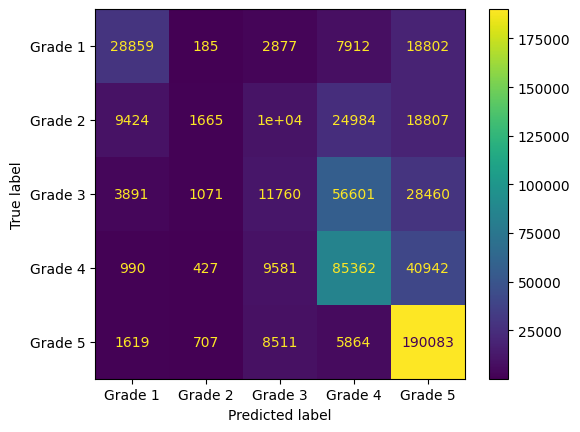

In [56]:
y_pred_lr = model_lr.predict(X_test)
y_pred_train_lr = model_lr.predict(X_train)

f1_lr = f1_score(y_test,y_pred_lr,average = 'weighted')
f1_train_lr = f1_score(y_train,y_pred_train_lr,average = 'weighted')
print(f"Test F1 Score: {f1_lr}")
print(f"Train F1 Score: {f1_train_lr}")

print('Confusion Matrix for Logistic Regression:')
ConfusionMatrixDisplay.from_estimator(model_lr, X_train, y_train, display_labels=class_names)

2. Decision Tree

Test F1 Score: 0.6744821162146267
Train F1 Score: 0.9464712916063273
Confusion Matrix for Decision Tree:


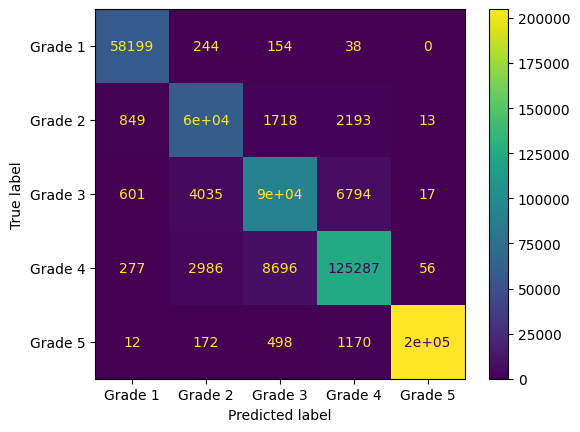

In [57]:
y_pred_dt = clf.predict(X_test)
y_pred_train_dt = clf.predict(X_train)

f1_dt = f1_score(y_test,y_pred_dt,average = 'weighted')
f1_train_dt = f1_score(y_train,y_pred_train_dt,average = 'weighted')
print(f"Test F1 Score: {f1_dt}")
print(f"Train F1 Score: {f1_train_dt}")

print('Confusion Matrix for Decision Tree:')
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=class_names)

3. Random Forest

Test F1 Score: 0.700484512715033
Train F1 Score: 0.9463636936305577
Confusion Matrix for Random Forest:


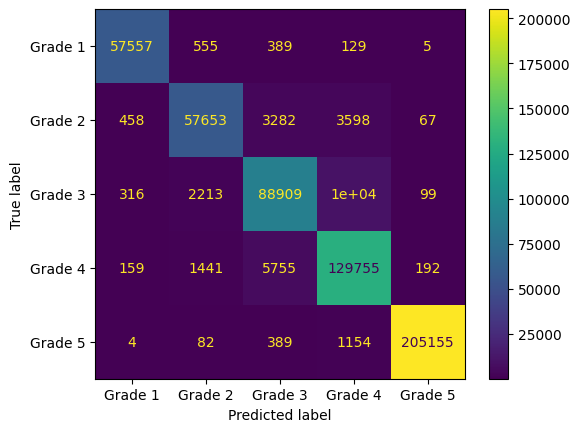

In [58]:
y_pred_rf = forest.predict(X_test)
y_pred_train_rf = forest.predict(X_train)

f1_rf = f1_score(y_test,y_pred_rf,average = 'weighted')
f1_train_rf = f1_score(y_train,y_pred_train_rf,average = 'weighted')
print(f"Test F1 Score: {f1_rf}")
print(f"Train F1 Score: {f1_train_rf}")

print('Confusion Matrix for Random Forest:')
ConfusionMatrixDisplay.from_estimator(forest, X_train, y_train, display_labels=class_names)

## Model Deployment
- Usually done after model optimization which includes hyperparameter tuning, dimensionality reduction, sampling of data etc.
- The optimized model is saved in pickle format and later it can be deployed in production.
- In this project, the best model is random forest model which was saved in pickle format and later connected to a Django web app and deployed in production.

In [52]:
def save_model(model,name):
    pickle.dump(model,open(f'{name}.pkl','wb'))

In [53]:
save_model(forest,'best_random_forest_model')